In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thomas')

<h3>One object:</h3>

In [3]:
with np.load('/Users/thomassiegert/python/testing/for-students/nova_analysis/downloads/094_V1187_Sco/save_StanFit_mass_NovaV1187_Sco_run001.npz') as content:
    flux_tmp = content['fit_tmp_flux']
    dist_tmp = content['fit_tmp_dist']
    lgM_tmp = content['fit_tmp_lgM']

In [4]:
# check files on github: changed version of original at https://github.com/grburgess/bayescorner
import bayescorner

In [5]:
flux_tmp.shape,dist_tmp.shape,lgM_tmp.shape

((500, 1), (500, 1), (500, 1))

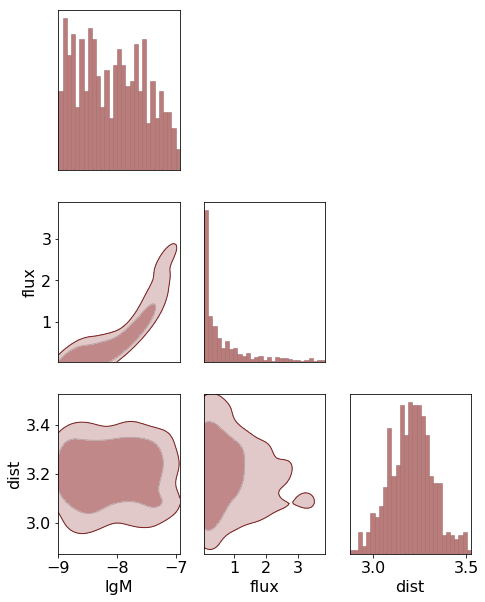

In [10]:
bayescorner.bayescorner(np.vstack([flux_tmp[:,0],dist_tmp[:,0],lgM_tmp[:,0]]),
                        param_names=['flux','dist','lgM'],levels=[0,0.0001,0.683,0.9]);

<h3>Catalogue...</h3>

In [11]:
import pandas as pd

In [12]:
print('| Reading in catalogue ...')
print('|')

# read in nova catalogue
data_frame = pd.read_csv('INTEGRAL_novae_wTimes.csv')

print('| Select appropriate novae ...')
print('|')

# define good novae according to selections from catalogue
good_novae = np.where(~np.isnan(data_frame['IJD']) &
                      (data_frame['Dist. \n(kpc)']+data_frame['Dist. Err. (kpc)'] < 25) &
                      ((data_frame['Var. type'] == 'N') |
                       (data_frame['Var. type'] == 'NAa') |
                       (data_frame['Var. type'] == 'NB') |
                       (data_frame['Var. type'] == 'NC') |
                       (data_frame['Var. type'] == 'NTS')))[0]

# information needed later
# objects identifiers
names    = data_frame['Name'][good_novae].values
# object distances and uncertainties
dist     = data_frame['Dist. \n(kpc)'][good_novae].values
dist_err = data_frame['Dist. Err. (kpc)'][good_novae].values

| Reading in catalogue ...
|
| Select appropriate novae ...
|


In [13]:
unknown_dist = 8.179

<h3>When you downloaded everything in /oasis/projects/nsf/csd657/tsiegert/shared/results/na22/mass_fits/Completed/</h3>

In [15]:
results_dir = '/Users/thomassiegert/python/testing/for-students/nova_analysis/downloads/'

In [19]:
import os, glob

In [20]:
result_files_001 = []
result_files_002 = []

for subdir, dirs, files in os.walk(results_dir):
    for file in files:
        if os.path.join(subdir, file).endswith('run001.npz'):
            result_files_001.append(os.path.join(subdir, file))
        if os.path.join(subdir, file).endswith('run002.npz'):
            result_files_002.append(os.path.join(subdir, file))

In [21]:
len(result_files_001),len(result_files_002)

(95, 31)

<h3>For this plot, I only use the 001 runs, would need to combine 001 and 002 for final plot</h3>

In [25]:
result_files_001 = np.array(result_files_001)
result_files_002 = np.array(result_files_002)

In [26]:
sdx = np.argsort(result_files_001)

In [27]:
result_files_001 = result_files_001[sdx]
#result_files_002 = result_files_002[sdx]

In [28]:
# do not iniclude diffuse emission
result_files_001 = result_files_001[1:]

In [29]:
color_unknown = 'black'

In [31]:
d_arr = np.logspace(-1,2,500)

In [32]:
def const_flux22(d,f):
    return np.log10(d**2*f/3838)

In [33]:
plot_fluxes = np.array([1e-3,1e-4,1e-5,1e-6,3e-5,3e-4,3e-6,3e-3,3e-7])
text_fluxes = np.array([r'$10^{-3}$',r'$10^{-4}$',r'$10^{-5}$',r'$10^{-6}$'])
posi_fluxes = np.array([[0.5,0.5,1.0,3.2],[-6.9,-7.9,-8.3,-8.3]])

In [35]:
see_colors = ['firebrick','lime','blue','purple','yellow']

<h3>Do that plot step by step so that you find out what it is doing</h3>

32 038 V1535_Sco 2.432036786690651
33 039 V5668_Sgr 1.564606253172057
57 063 V2674_Oph 1.8166797465122009


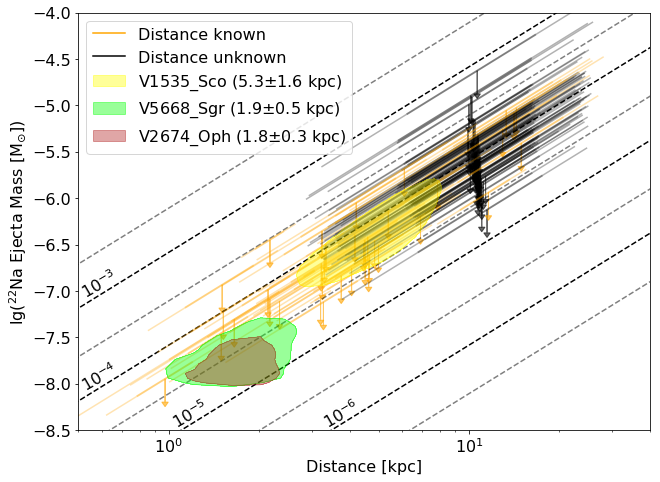

In [37]:
fig, ax = plt.subplots(figsize=(10.24,7.68))
ax.set_xlim(0.5,40)
ax.set_ylim(-8.5,-4.0)
ax.set_xscale('log')
ax.set_xlabel('Distance [kpc]')
ax.set_ylabel(r'lg($^{22}\mathrm{Na}$ Ejecta Mass [$\mathrm{M_{\odot}}$])')

for i in range(len(plot_fluxes)):
    if i < 4:
        ax.plot(d_arr,const_flux22(d_arr,plot_fluxes[i]),color='black',linestyle='--')
        ax.text(posi_fluxes[0,i],posi_fluxes[1,i],text_fluxes[i],rotation=30)
    else:
        ax.plot(d_arr,const_flux22(d_arr,plot_fluxes[i]),color='black',linestyle='--',alpha=0.5)
    
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    if (np.median(flux_tmp[:,0])/np.std(flux_tmp[:,0]) < 1.5):
        
        d_med = np.median(dist_tmp[:,0])
        d_std = np.std(dist_tmp[:,0])
        dm_min1 = np.percentile(dist_tmp[:,0],50-68.3/2)#d_med-d_std
        dm_max1 = np.percentile(dist_tmp[:,0],50+68.3/2)#d_med+d_std
        dm_min2 = np.percentile(dist_tmp[:,0],50-95.4/2)#d_med-2*d_std
        dm_max2 = np.percentile(dist_tmp[:,0],50+95.4/2)#d_med+2*d_std
        ddx = np.where((dist_tmp[:,0] > dm_min1) & (dist_tmp[:,0] < dm_max1))
        ddxm1 = np.where((dist_tmp[:,0] > dm_min2) & (dist_tmp[:,0] < dm_min1))
        ddxp1 = np.where((dist_tmp[:,0] > dm_max1) & (dist_tmp[:,0] < dm_max2))

        lgM_med = np.percentile(lgM_tmp[ddx,0],99)
        lgMm_min1 = 2*np.log10(dm_min1)-2*np.log10(d_med)+np.percentile(lgM_tmp[ddx,0],99)
        lgMm_max1 = 2*np.log10(dm_max1)-2*np.log10(d_med)+np.percentile(lgM_tmp[ddx,0],99)
        lgMm_min2 = 2*np.log10(dm_min2)-2*np.log10(d_med)+np.percentile(lgM_tmp[ddx,0],99)
        lgMm_max2 = 2*np.log10(dm_max2)-2*np.log10(d_med)+np.percentile(lgM_tmp[ddx,0],99)

        #ax.contourf(xbins, ybins, sigma, levels=[0,0.90], colors=color_unknown, alpha=.05,zorder=-100)
        #ax.plot([d_med],[lgM_med],'k',alpha=0.3,markersize=20,marker=(3, 0, 90))
        if ((d_med > 9.5) & (d_med < 11.5)):
            ax.arrow(d_med, lgM_med, 0, -0.25, head_width=0.05*d_med, head_length=0.05, fc='k', ec='k',alpha=0.6)
            ax.plot([dm_min1,dm_max1],[lgMm_min1,lgMm_max1],'k-',alpha=0.3,linewidth=2)
            ax.plot([dm_min2,dm_max2],[lgMm_min2,lgMm_max2],'k-',alpha=0.3)
        else:
            ax.arrow(d_med, lgM_med, 0, -0.25, head_width=0.05*d_med, head_length=0.05, fc='orange', ec='orange',alpha=0.6)
            ax.plot([dm_min1,dm_max1],[lgMm_min1,lgMm_max1],color='orange',linestyle='-',alpha=0.3,linewidth=2)
            ax.plot([dm_min2,dm_max2],[lgMm_min2,lgMm_max2],color='orange',linestyle='-',alpha=0.3)
        
    else:
        d_med = np.median(dist_tmp[:,0])
        d_std = np.std(dist_tmp[:,0])
        print(i,
              result_files_001[i].split(results_dir)[1][0:3],
              result_files_001[i].split(results_dir)[1].split('/')[0][4:],
              np.median(flux_tmp[:,0])/np.std(flux_tmp[:,0]))
        xbins, ybins, sigma = bayescorner.compute_sigma_level.compute_sigma_level(
        dist_tmp[:,0], lgM_tmp[:,0], ymin=-9, ymax=-4, xmin=0, xmax=40, nbins=100)
        
        known_color = see_colors[np.int(np.random.rand()*5)]#plt.cm.jet(np.random.rand(3))
        ax.contourf(xbins, ybins, sigma, levels=[0,0.683], colors=known_color, alpha=.4,zorder=1000)
        ax.contour(xbins,ybins,sigma,levels=[0.683], colors=known_color,linewidths=0.5)
        ax.fill_between(np.repeat(100,5),np.repeat(-100,5), color=known_color, alpha=.4,
                       label=result_files_001[i].split(results_dir)[1].split('/')[0][4:]+
                       str(r' (%.1f$\pm$%.1f kpc)' % (d_med,d_std)))

ax.plot([100,100],[-10,-10], color='orange',alpha=1,label='Distance known')
ax.plot([100,100],[-10,-10], color='black',alpha=1,label='Distance unknown')
    
ax.legend()
#plt.savefig('Summary_plot_22Na_lgM_dist_flux.pdf')

<h3>Example results for V5668_Sgr (index 33)</h3>

In [38]:
with np.load(result_files_001[33]) as content:
    flux_tmp = content['fit_tmp_flux']
    dist_tmp = content['fit_tmp_dist']
    lgM_tmp = content['fit_tmp_lgM']

In [39]:
# median
10**np.percentile(lgM_tmp[:,0],50)*1e8

2.042615543552285

In [40]:
# mean
10**np.mean(lgM_tmp[:,0])*1e8

2.268551391445102

In [43]:
#lower and upper bounds with levels 0.075, 2.3, 15.85, 50, 84.15, 97.7, 99.925% levels
(10**np.percentile(lgM_tmp[:,0],np.array([50-99.85/2,50-95.4/2,50-68.3/2,50,50+68.3/2,50+95.4/2,50+99.85/2]))-10**np.percentile(lgM_tmp[:,0],50))*1e8

array([-1.04056348, -1.0096843 , -0.80935103,  0.        ,  2.15373633,
        6.18598631, 16.99301146])

<h3>Summary plots without fancy</h3>

Text(0, 0.5, 'SNR')

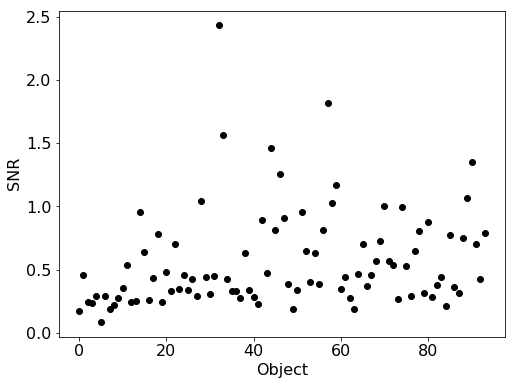

In [44]:
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    plt.plot(i,(np.median(flux_tmp[:,0])/np.std(flux_tmp[:,0])),'ko')
plt.xlabel('Object')
plt.ylabel('SNR')

Text(0, 0.5, 'Flux [$10^{-5}\\,\\mathrm{ph\\,cm^{-2}\\,s^{-1}}$]')

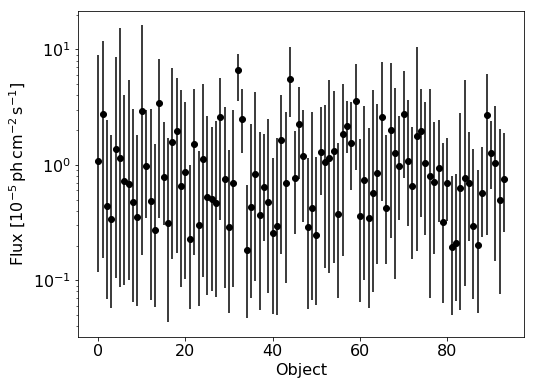

In [48]:
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    plt.errorbar(i,np.median(flux_tmp[:,0]),yerr=np.abs((np.percentile(flux_tmp[:,0],np.array([15,85]))-np.median(flux_tmp[:,0])).reshape(-1,1)),fmt='ko')
    
plt.yscale('log')
plt.xlabel('Object')
plt.ylabel(r'Flux [$10^{-5}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]')

Text(0, 0.5, 'Flux Limit [$10^{-5}\\,\\mathrm{ph\\,cm^{-2}\\,s^{-1}}$]')

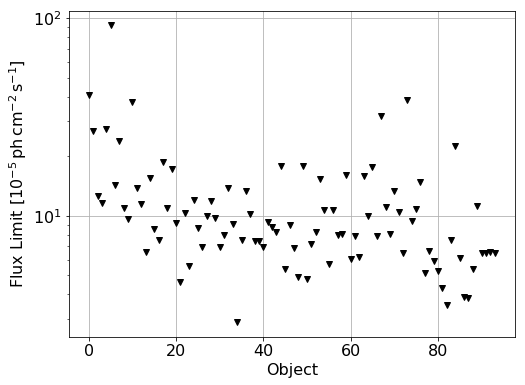

In [49]:
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    plt.plot(i,np.percentile(flux_tmp[:,0],99.9),'kv')
    
plt.yscale('log')

plt.grid()
plt.xlabel('Object')
plt.ylabel(r'Flux Limit [$10^{-5}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]')

Text(0, 0.5, 'Distance [kpc]')

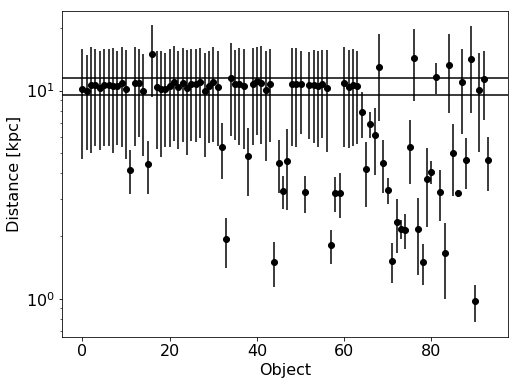

In [50]:
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    plt.errorbar(i,np.median(dist_tmp[:,0]),yerr=np.std(dist_tmp[:,0]),fmt='ko')
    
plt.axhline(9.5)
plt.axhline(11.5)
plt.yscale('log')
plt.xlabel('Object')
plt.ylabel('Distance [kpc]')

Text(0, 0.5, 'Mass limit [$10^{}$^]')

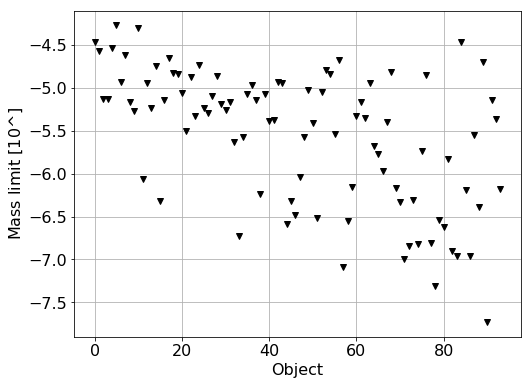

In [54]:
for i in range(len(result_files_001)):
    with np.load(result_files_001[i]) as content:
        flux_tmp = content['fit_tmp_flux']
        dist_tmp = content['fit_tmp_dist']
        lgM_tmp = content['fit_tmp_lgM']    

    plt.plot(i,np.percentile(lgM_tmp[:,0],99.9),'kv')
    
#3plt.yscale('log')

plt.grid()
plt.xlabel('Object')
plt.ylabel(r'Mass limit [$10^{}$^]')

<h3>Combining two runs for diffuse emission:</h3>

In [55]:
import numpy as np

directory = '/Users/thomassiegert/python/testing/for-students/nova_analysis/downloads/'

with np.load(directory+'save_StanFit_mass_NovaDiffuse_Emission_run055.npz') as content:
    flux_tmp1 = content['fit_tmp_flux']
    R_CN_tmp1 = content['fit_tmp_R_CN']
    lgM_tmp1 = content['fit_tmp_lgM']
    Abg_lines_tmp1 = content['fit_tmp_Abg_lines']
    Abg_conti_tmp1 = content['fit_tmp_Abg_conti']
    
ns1 = len(flux_tmp1)    

with np.load(directory+'save_StanFit_mass_NovaDiffuse_Emission_run056.npz') as content:
    flux_tmp2 = content['fit_tmp_flux']
    R_CN_tmp2 = content['fit_tmp_R_CN']
    lgM_tmp2 = content['fit_tmp_lgM']
    Abg_lines_tmp2 = content['fit_tmp_Abg_lines']
    Abg_conti_tmp2 = content['fit_tmp_Abg_conti']
    
ns2 = len(flux_tmp2)

ns_tot = ns1 + ns2
    

flux_tmp = np.zeros((ns_tot,1))
R_CN_tmp = np.zeros(ns_tot)
lgM_tmp  = np.zeros((ns_tot,1))
Abg_lines_tmp  = np.zeros((ns_tot,1674))
Abg_conti_tmp  = np.zeros((ns_tot,1674))

flux_tmp[0:ns1,:] = flux_tmp1
flux_tmp[ns1:,:]  = flux_tmp2
R_CN_tmp[0:ns1] = R_CN_tmp1
R_CN_tmp[ns1:]  = R_CN_tmp2
lgM_tmp[0:ns1,:]  = lgM_tmp1
lgM_tmp[ns1:,:]   = lgM_tmp2
Abg_lines_tmp[0:ns1,:]  = Abg_lines_tmp1
Abg_lines_tmp[ns1:,:]   = Abg_lines_tmp2
Abg_conti_tmp[0:ns1,:]  = Abg_conti_tmp1
Abg_conti_tmp[ns1:,:]   = Abg_conti_tmp2

np.savez_compressed(directory+'save_StanFit_mass_NovaDiffuse_Emission_combined.npz',
                    fit_tmp_flux=flux_tmp,
                    fit_tmp_R_CN=R_CN_tmp,
                    fit_tmp_lgM =lgM_tmp,
                    fit_tmp_Abg_lines = Abg_lines_tmp,
                    fit_tmp_Abg_conti = Abg_conti_tmp)

In [56]:
with np.load('/Users/thomassiegert/python/testing/for-students/nova_analysis/downloads/save_StanFit_mass_NovaDiffuse_Emission_combined.npz') as content:
    flux_tmp = content['fit_tmp_flux']
    R_CN_tmp = content['fit_tmp_R_CN']
    lgM_tmp = content['fit_tmp_lgM']
    Abg_lines_tmp = content['fit_tmp_Abg_lines']
    Abg_conti_tmp = content['fit_tmp_Abg_conti']

In [57]:
flux_tmp.shape,R_CN_tmp.shape

((1000, 1), (1000,))

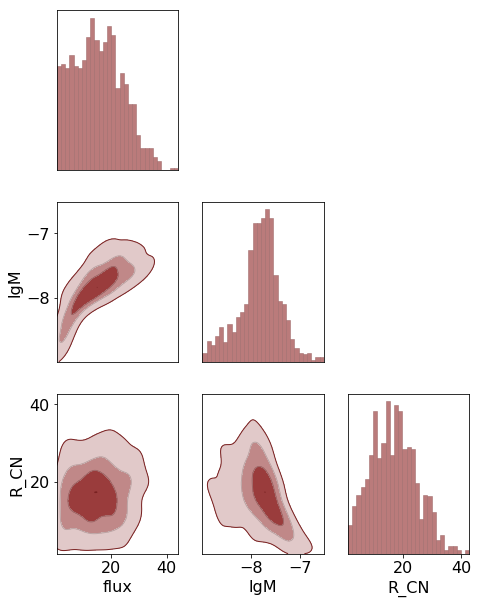

In [58]:
bayescorner.bayescorner(np.vstack([lgM_tmp[:,0],R_CN_tmp[:],flux_tmp[:,0]]),
                        param_names=['lgM','R_CN','flux'],levels=[0.001,0.30,0.60,0.90]);

<h3>Bounds to quote and for plot</h3>

In [59]:
flux_bounds_tmp = np.percentile(flux_tmp[:,0],np.array([15,50,99]))*1e-5
flux_bounds_tmp

array([4.97398184e-05, 1.47707572e-04, 3.56111312e-04])

In [60]:
rcn_bounds_tmp = np.percentile(R_CN_tmp,np.array([2.5,50,97.5]))
rcn_bounds_tmp

array([ 3.5489322 , 16.79584646, 31.94534297])

In [61]:
xbins, ybins, sigma = bayescorner.compute_sigma_level.compute_sigma_level(
    lgM_tmp[:,0], R_CN_tmp, ymin=0, ymax=50, xmin=-9, xmax=-6, nbins=40)

In [62]:
lgM_arr = np.arange(-10,-5,0.05)

In [63]:
from scipy.ndimage import gaussian_filter1d as smooth

<h3>Also here step by step to see what all the commands are doing ...</h3>

Text(0.5, 0, 'PDF(ONe Nova Rate)')

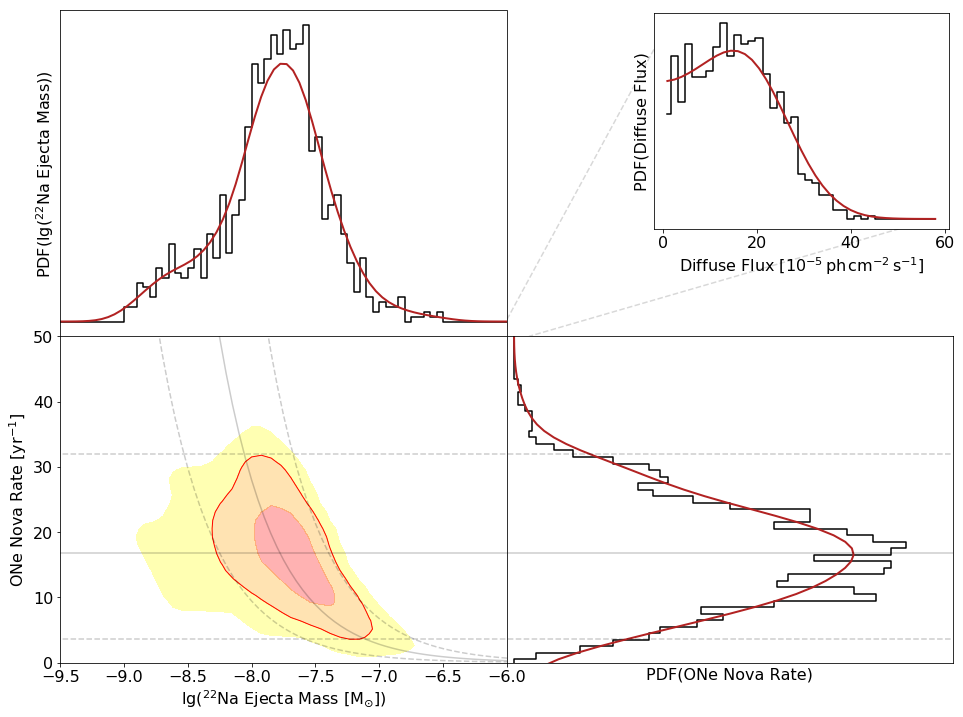

In [65]:
fig, axes = plt.subplots(figsize=(16,12),nrows=2,ncols=2)

plt.subplots_adjust(hspace=0,wspace=0)

axes[1,0].contourf(xbins, ybins, sigma, levels=[0,0.3,0.683,0.9], colors=('red','orange','yellow'), alpha=.3)
cc = axes[1,0].contour(xbins, ybins, sigma, levels=[0,0.683], colors='red', linewidths=1)

axes[1,0].plot(lgM_arr,flux_bounds_tmp[0]/527.7*np.exp(np.log(10)*(-lgM_arr)),color='black',linestyle='--',alpha=0.2)
axes[1,0].plot(lgM_arr,flux_bounds_tmp[1]/527.7*np.exp(np.log(10)*(-lgM_arr)),color='black',linestyle='-',alpha=0.2)
axes[1,0].plot(lgM_arr,flux_bounds_tmp[2]/527.7*np.exp(np.log(10)*(-lgM_arr)),color='black',linestyle='--',alpha=0.2)


axes[1,0].plot(lgM_arr,np.repeat(rcn_bounds_tmp[0],len(lgM_arr)),color='black',linestyle='--',alpha=0.2)
axes[1,0].plot(lgM_arr,np.repeat(rcn_bounds_tmp[1],len(lgM_arr)),color='black',linestyle='-',alpha=0.2)
axes[1,0].plot(lgM_arr,np.repeat(rcn_bounds_tmp[2],len(lgM_arr)),color='black',linestyle='--',alpha=0.2)

#axes[1,0].yscale('log')
axes[1,0].set_ylim(0.0,50)
axes[1,0].set_xlim(-9.5,-6)
axes[1,0].set_xlabel(r'lg($^{22}\mathrm{Na}$ Ejecta Mass [$\mathrm{M_{\odot}}$])')
axes[1,0].set_ylabel(r'ONe Nova Rate [$\mathrm{yr^{-1}}$]')

axes[0,0].set_yticks([])
axes[0,0].set_xticks([])
axes[0,0].set_xlim(-9.5,-6)
axes[0,0].set_ylabel(r'PDF(lg($^{22}\mathrm{Na}$ Ejecta Mass))')
hist_lgM = np.histogram(lgM_tmp[:,0],bins=np.arange(-9.6,-5.9,0.05),density=True)
axes[0,0].step(hist_lgM[1][0:-1]+0.025,hist_lgM[0],color='black',where='mid',)
axes[0,0].plot(hist_lgM[1][0:-1]+0.025,smooth(hist_lgM[0],3),color='firebrick',linewidth=2)

axes[0,1].set_yticks([])
axes[0,1].set_xticks([])
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
hist_flux = np.histogram(flux_tmp[:,0],bins=np.arange(0,60,1.5),density=True)
axin01 = axes[0,1].inset_axes([0.33, 0.33, 0.66, 0.66])
axin01.step(hist_flux[1][0:-1]+1,hist_flux[0],color='black',where='mid',)
axin01.plot(hist_flux[1][0:-1]+1,smooth(hist_flux[0],3),color='firebrick',linewidth=2)
axin01.set_xlabel(r'Diffuse Flux [$10^{-5}\,\mathrm{ph\,cm^{-2}\,s^{-1}}$]')
axin01.set_ylabel(r'PDF(Diffuse Flux)')
axin01.set_yticks([])
axes[0,1].set_xlim(0,1)
axes[0,1].set_ylim(0,1)
axes[0,1].plot([0.88,0.05],[0.33,0],color='gray',linestyle='--',alpha=0.3)
axes[0,1].plot([0.33,0],[0.88,0.05],color='gray',linestyle='--',alpha=0.3)

axes[1,1].set_yticks([])
axes[1,1].set_xticks([])
axes[1,1].set_xlim(-0.001,0.06)
axes[1,1].set_ylim(0,50)
hist_RCN = np.histogram(R_CN_tmp[:],bins=np.arange(-3,53,1),density=True)
axes[1,1].step(hist_RCN[0],hist_RCN[1][0:-1]+0.5,color='black',where='mid')
axes[1,1].plot(smooth(hist_RCN[0],3),hist_RCN[1][0:-1]+0.5,color='firebrick',linewidth=2)
axes[1,1].plot([-1,1],np.repeat(rcn_bounds_tmp[0],2),color='black',linestyle='--',alpha=0.2)
axes[1,1].plot([-1,1],np.repeat(rcn_bounds_tmp[1],2),color='black',linestyle='-',alpha=0.2)
axes[1,1].plot([-1,1],np.repeat(rcn_bounds_tmp[2],2),color='black',linestyle='--',alpha=0.2)
axes[1,1].set_xlabel(r'PDF(ONe Nova Rate)')

#plt.savefig('Diffuse_Emission_Posteriors_22Na.pdf')

<h3>Values:</h3>

In [67]:
# median
10**np.percentile(lgM_tmp[:,0],50)*1e8

1.6091078291115193

In [68]:
# mean
10**np.mean(lgM_tmp[:,0])*1e8

1.4931815854581123

In [69]:
# uncertainties (bounds-median)
(10**np.percentile(lgM_tmp[:,0],np.array([50-95.4/2,50-68.3/2,50,50+68.3/2,50+95.4/2]))-10**np.percentile(lgM_tmp[:,0],50))*1e8

array([-1.44164325, -1.01244488,  0.        ,  1.86659901,  8.03496737])

<h1>Once 7Be is finished, do the same for the other runs!</h1